# **AUTHOR : SHREEYA PARAB**
## **OIASIS INFOBYTES** : DATA SCIENCE
# **TASK 1 :** IRIS FLOWER CLASSIFICATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# **PROBLEM STATEMENT:**

**Given/Input:**
Measurements of Sepal Length, Sepal Width, Petal Length, and Petal Width for iris flowers.

**Output:**
Classify the iris flowers into one of three species: Setosa, Versicolor, Virginica.

**Objective:**
Train a Logistic Regression model to perform multi-class classification of iris species based on their measurements.

# **STEPS TO SOLVE:**

**1.Data Preparation:**
Obtain a dataset containing iris measurements and corresponding species labels.
Split the dataset into training and testing sets.

**2.Model Selection:**
Choose Logistic Regression as the classification model for this task.

**3.Model Training:**
Train the Logistic Regression model using the training data.

**4.Model Evaluation:**
Evaluate the model's performance using accuracy and confusion matrix on the test data.

**5.Model Prediction:**
Use the trained model to predict the species of new iris flowers based on their measurements.

In [3]:
data=pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

**STATEMENT:** So data is not imbalanced

In [6]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data=data.drop(columns=['Id'])
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **Encoding of the Species column**

In [8]:
encoder = LabelEncoder()
data['Species'] = encoder.fit_transform(data['Species'])
mapping_dictionary = dict(zip(range(len(encoder.classes_)), encoder.classes_))
print(mapping_dictionary)
print(data.head())

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0


# **Visualising Data**

Correlation Heatmap with Annotations

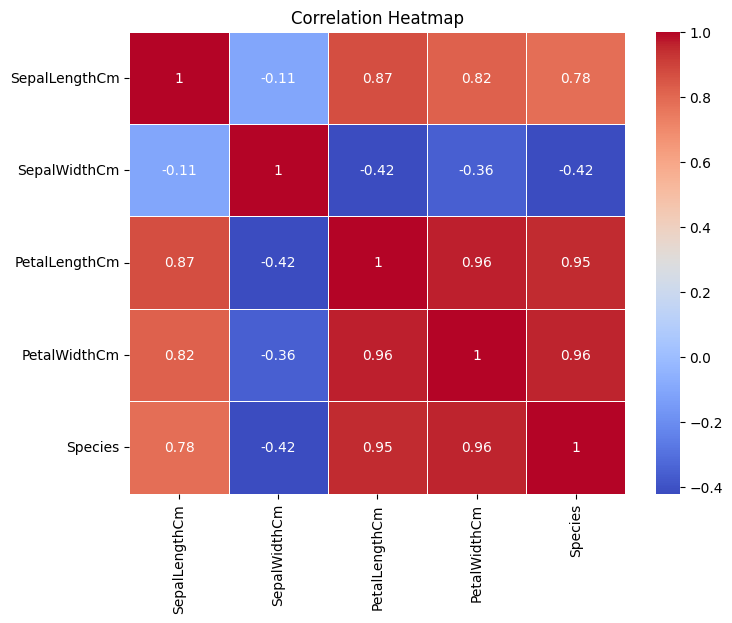

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Pairplot with KDE and Species Coloring

<Figure size 1000x800 with 0 Axes>

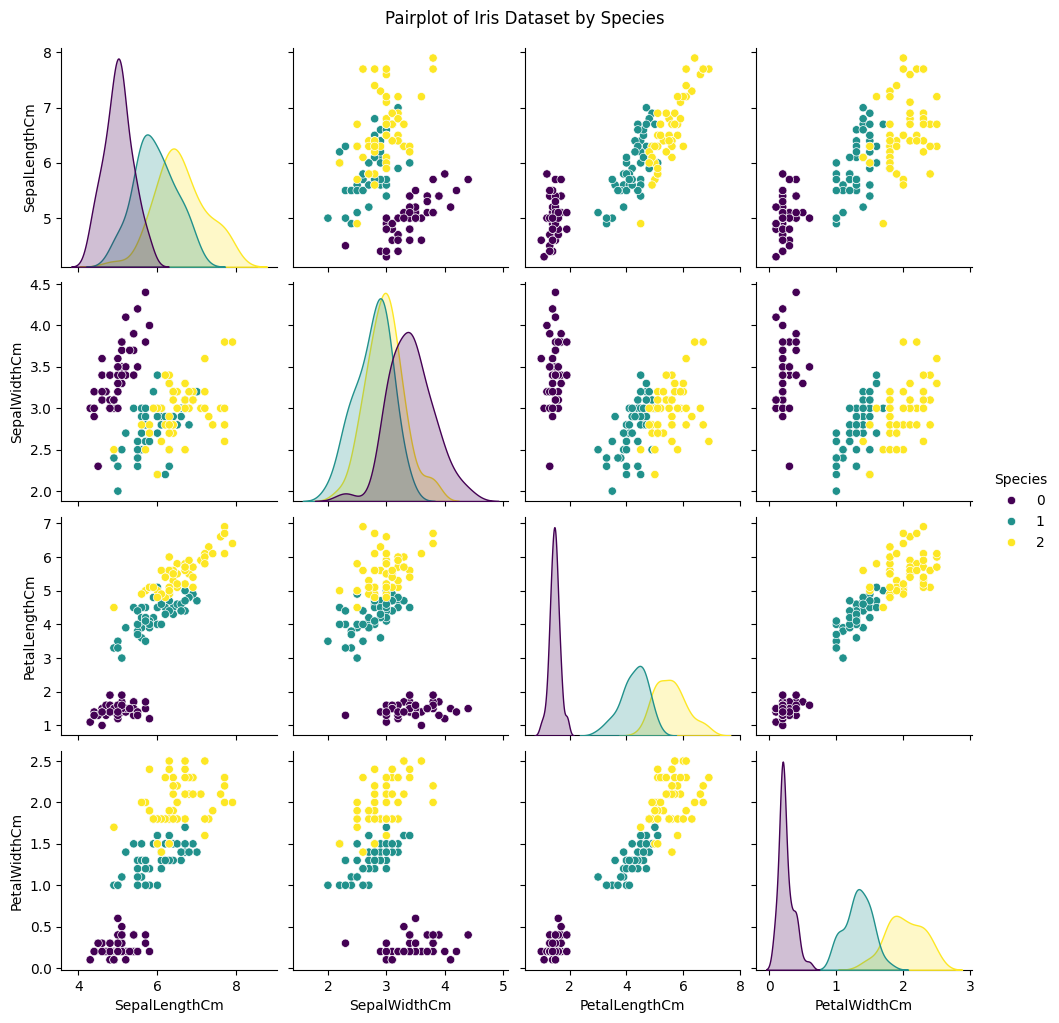

In [10]:
plt.figure(figsize=(10, 8))
sns.pairplot(data, hue='Species', diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of Iris Dataset by Species', y=1.02)
plt.show()

Histograms of Features

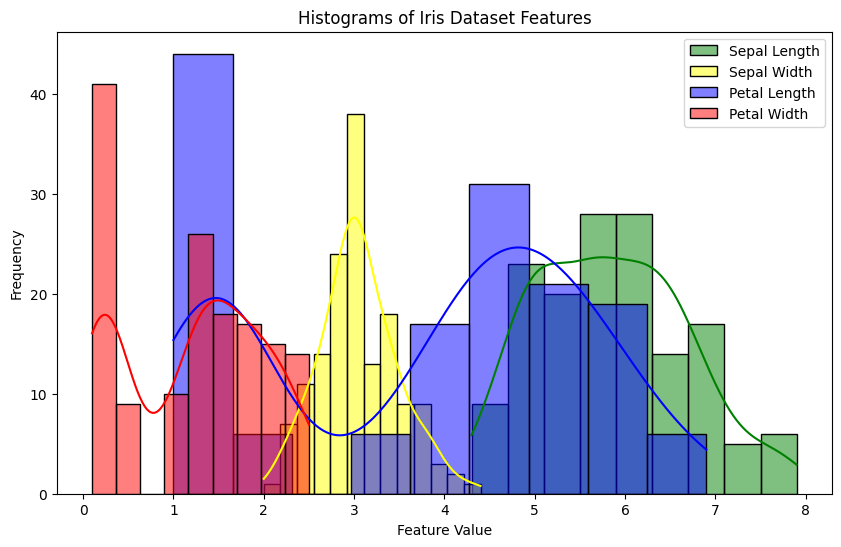

In [11]:
# Histograms of Features
plt.figure(figsize=(10, 6))

sns.histplot(data['SepalLengthCm'], color='green', label='Sepal Length', kde=True)
sns.histplot(data['SepalWidthCm'], color='yellow', label='Sepal Width', kde=True)
sns.histplot(data['PetalLengthCm'], color='blue', label='Petal Length', kde=True)
sns.histplot(data['PetalWidthCm'], color='red', label='Petal Width', kde=True)

plt.title('Histograms of Iris Dataset Features')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# **Analysis as per above plots**

**Histogram Observations**

PetalWidthCm has the narrowest range of values compared to other features.

SepalLengthCm exhibits a wider spread of values with some instances having notably higher measurements than other features.

PetalLengthCm displays the most extensive range of values among all features, varying significantly from shorter to longer lengths.

**PairPlot Insights**

**Virginica** tends to have higher SepalLengthCm relative to SepalWidthCm and PetalWidthCm. It also shows higher PetalLengthCm relative to other dimensions.

**Versicolor** typically displays higher PetalLengthCm relative to other dimensions. It also shows higher SepalLengthCm but generally with lower maximum values compared to Virginica.


**Setosa** is characterized by higher SepalLengthCm and SepalWidthCm values within a limited range of PetalLengthCm (0-2) and PetalWidthCm (0-1), distinguishing it with distinct measurements.

# **Scaling and Splitting of the Data**

In [12]:
print('Range of Features before:')
print(data['SepalLengthCm'].max()-data['SepalLengthCm'].min())
print(data['SepalWidthCm'].max()-data['SepalWidthCm'].min())
print(data['PetalLengthCm'].max()-data['PetalLengthCm'].min())
print(data['PetalWidthCm'].max()-data['PetalWidthCm'].min())

Range of Features before:
3.6000000000000005
2.4000000000000004
5.9
2.4


In [13]:
X=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
Y=data[['Species']].values.flatten()

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=36)
x_train[:5,],y_train[:5]

(array([[5.8, 2.7, 5.1, 1.9],
        [4.9, 3.1, 1.5, 0.1],
        [5.7, 2.8, 4.1, 1.3],
        [6.1, 3. , 4.9, 1.8],
        [6.1, 2.9, 4.7, 1.4]]),
 array([2, 0, 1, 2, 1]))

In [14]:
scaler=StandardScaler()
x_train_scale=scaler.fit_transform(x_train,y_train)
x_test_scale=scaler.fit_transform(x_test,y_test)

x_train_scale[:5,],x_test_scale[:5]

(array([[-0.01333569, -0.75003852,  0.77002924,  0.93677484],
        [-1.15899309,  0.17647965, -1.3255147 , -1.47535656],
        [-0.14063096, -0.51840898,  0.1879337 ,  0.13273104],
        [ 0.3685501 , -0.05514989,  0.65361014,  0.80276754],
        [ 0.3685501 , -0.28677944,  0.53719103,  0.26673834]]),
 array([[ 1.19117647,  0.17783263,  0.53239732,  0.26056861],
        [ 0.86029412, -0.29290081,  0.80280228,  1.39530289],
        [ 0.86029412, -0.05753409,  0.53239732,  0.3866502 ],
        [ 1.96323529, -1.2343677 ,  1.72217914,  1.39530289],
        [ 1.96323529, -0.76363426,  1.61401715,  1.01705813]]))

# **Model Training**

In [15]:
def accuracy_of_model(y_test, y_pred):
    print("Confusion Matrix =>\n{}".format(confusion_matrix(y_test,y_pred)))
    print('Accuracy Score => {}'.format(accuracy_score(y_test, y_pred)))

In [16]:
from sklearn.linear_model import LogisticRegression

mlogreg=LogisticRegression()
mlogreg.fit(x_train_scale,y_train)
y_train_pred=mlogreg.predict(x_train_scale)
print('Model evaluation for training data: ')
accuracy_of_model(y_train,y_train_pred)

y_test_pred=mlogreg.predict(x_test_scale)
print('\nModel evaluation for test data: ')
accuracy_of_model(y_test,y_test_pred)

Model evaluation for training data: 
Confusion Matrix =>
[[34  0  0]
 [ 0 34  2]
 [ 0  1 34]]
Accuracy Score => 0.9714285714285714

Model evaluation for test data: 
Confusion Matrix =>
[[16  0  0]
 [ 0 13  1]
 [ 0  0 15]]
Accuracy Score => 0.9777777777777777


# **Plot of Predicted to Actual Values**

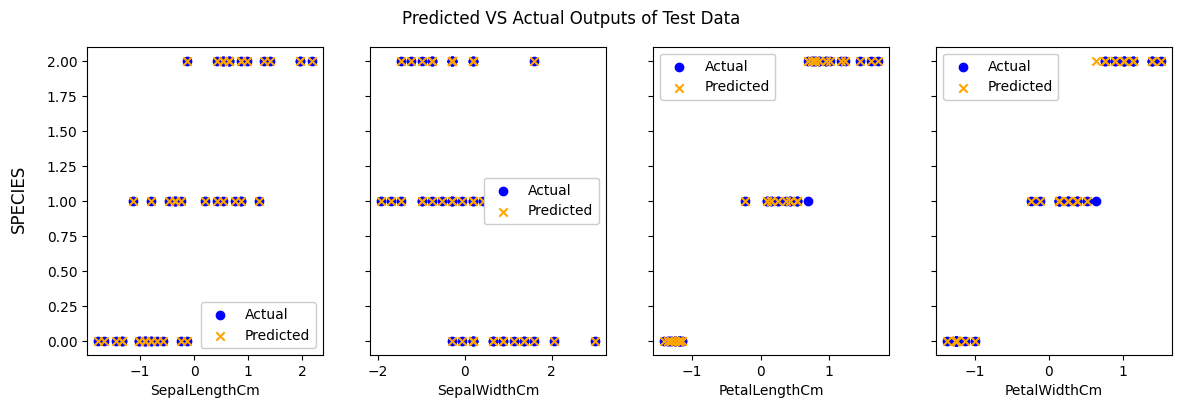

In [18]:

fig,ax=plt.subplots(1,4,figsize=(14,4),sharey=True)
col=0
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for triaxis in ax:
    triaxis.scatter(x_test_scale[:,col],y_test,color='blue',label='Actual')
    triaxis.scatter(x_test_scale[:,col],y_test_pred,color='orange',label='Predicted',marker='x')
    triaxis.set_xlabel(features[col])
    triaxis.legend(framealpha=1, frameon=True)
    col+=1
fig.text(0.07,0.5,'SPECIES',va='center',rotation='vertical',fontsize=12)
fig.text(0.35,0.95,'Predicted VS Actual Outputs of Test Data',va='center',rotation='horizontal',fontsize=12)
plt.show(); plt.close()